# Lab 6:  Implement your own version of K-means

In class we have discussed how the K-means algorithm works, and you can read more about it in the text.  Your task this week is to implement your own version of K-means, and use it to cluster faces in the Olivetti dataset.  

You can work on this task either by yourself, or with one or two partners.  Please do *not* have a groupsize larger than 3, however.  Submission instructions are on Canvas.


# Part I:  Implement K-means

Your task is to implement a function called `get_clusters` that takes in a set of data and a number of clusters, and returns the centroids of those clusters, as well as the closest centroid for each data point.  Your code should make use of reasonable subfunctions, use good choices of variables, and be commented as necessary.

In [10]:
import numpy as np


In [12]:

def get_clusters(data: np.ndarray, n_clusters: int) -> tuple[np.ndarray, np.ndarray]:
    
  
     # initalizes centroids at random by selecting random vector points
    n_samples = data.shape[0]
    random_indices = np.random.choice(n_samples, size=n_clusters, replace=False)
    centroids = data[random_indices]
    
    for _ in range(100):  # max # of iterations to stop infinite loops from happening
        # stores the old centroids to check for convergence 
        old_centroids = centroids.copy()
        
        # finds the closest centroid for each point
        distances = np.sqrt(((data[:, np.newaxis] - centroids) ** 2).sum(axis=2))
        closest_centroids = np.argmin(distances, axis=1)
        
        # updata centroids by getting mean of vector points
        for k in range(n_clusters):
            if np.sum(closest_centroids == k) > 0:  # Avoid empty clusters
                centroids[k] = np.mean(data[closest_centroids == k], axis=0)
        
        # this checks for convergence
        if np.all(np.abs(new_centroids - old_centroids) < 1e-4):
            break
    
    return centroids, closest_centroids

# Part II:  Use your code to cluster the Olivetti dataset

Now use your clustering code to cluster the following pseudo-random data.  Examine the following questions:
* How well does your code do if you try to use 4 clusters?
* How well does it do if you use a different number of clusters?  Show how some perforamance metric changes over the number of clusters
* What happens if you modify the data to be either more or less overlapped?  (You can do this by adjusting the 'cluster_center' variable, or the covs)?

Note:  if you had any issues with the implementation in Part I, just use the default KMeans class from SKLearn for this part

In [13]:
import pandas as pd
import seaborn as sns

### Generate psuedo random clusters

In [44]:
# cluster centers in x,y
cluster_centers = [                                                     
    (0, 0), 
    (2, 0), 
    (0, 1), 
    (3, 2)
]


# oringinal cluster centers for reference:
# (0,0)
# (2,0)
# (0,1)
# (3,2)



# for more overlapping, you could change the centers to: (makes them closer)
# (0, 0),
# (1, 0),    
# (0, 0.5),
# (1, 1)     


# for less overlapping, can change them to:
# (0, 0),                                         (I'll discuss effect of changing the overlapping in the summary)
# (4, 0),  
# (0, 4),
# (4, 4)     
covs = [
    [[.25, 0], [0, .3]],
    [[.5, .1], [.1, .5]],
    [[.25, 0], [0, .25]],
    [[.5, 0], [0, .5]],
]
n_pts_per_cluster = 20

data = []
for ix, cluster in enumerate(cluster_centers):
    cov = covs[ix]
    samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
    data += [(ix, s[0], s[1]) for s in samples]

data = pd.DataFrame(data, columns=['label', 'x', 'y'])


### Visualze the data

<Axes: xlabel='x', ylabel='y'>

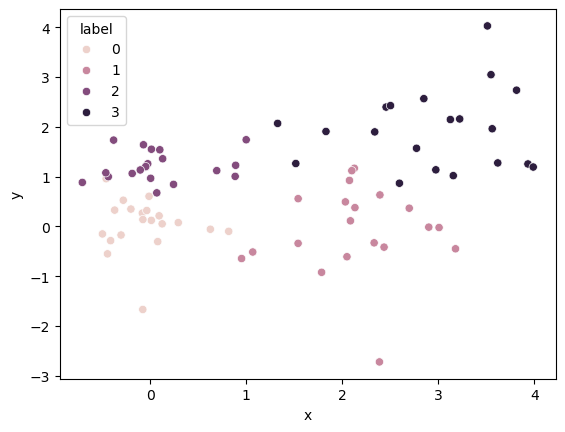

In [45]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)

### Experiment with clustering here

In [47]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# convets to numpy array to cluster
X = data[['x', 'y']].values

# makes kmeans model
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

c:\Users\heath\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


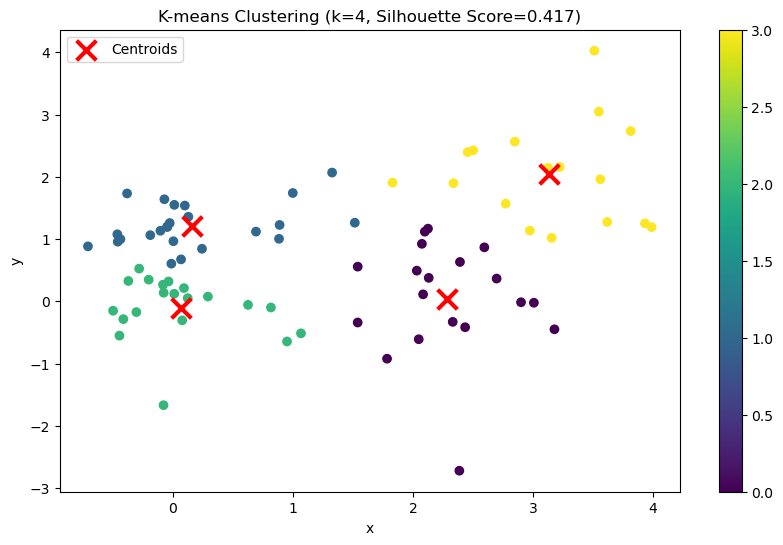

In [48]:
# here is the plotting for 4 clusters 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidth=3, label='Centroids')
plt.title(f'K-means Clustering (k=4, Silhouette Score={silhouette_avg:.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar(scatter)
plt.show()

With MORE overlapping, the shilhouette has decreased (for 4 clusters, it is now at 0.350). It is generally harder to distinguish betwen the clusters themselves. It also appears that there is now a higher chance of misclassification. Random initlizations may also be changed as well.


With LESS overlapping, the silhouette score has drmatically increased when using 4 clusters, all the way to 0.725. It is much easier to differentiate between the differnt clusters, and results are more consistent when using diferent random initializations. Clustering perforamnce with less overlapping in more effective in this instance.

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# convets to numpy array to cluster
X = data[['x', 'y']].values

# makes kmeans model
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

c:\Users\heath\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


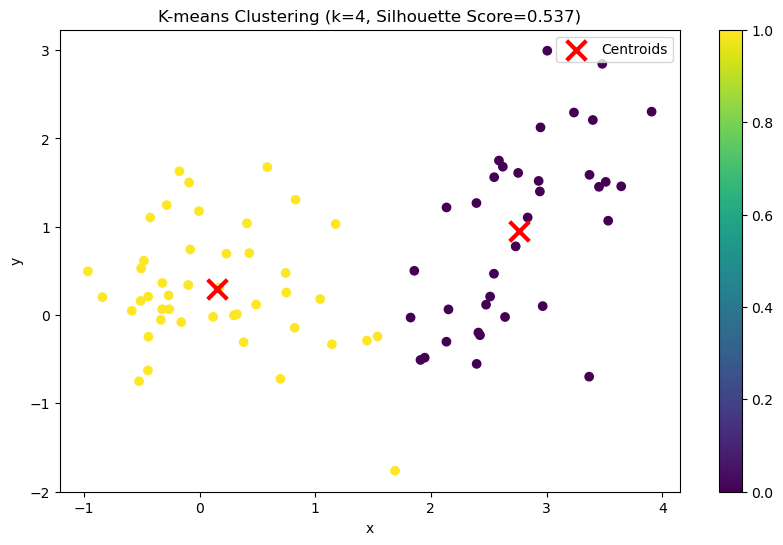

In [19]:
# here is the plotting for 4 clusters 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidth=3, label='Centroids')
plt.title(f'K-means Clustering (k=4, Silhouette Score={silhouette_avg:.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar(scatter)
plt.show()